In [1]:
!pip install shap

In [2]:
import shap
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

In [4]:
data = load_breast_cancer()
X,y = data['data'], data['target']

In [5]:
data['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [8]:
model = LinearSVC()
model.fit(X_train, y_train)# treina o modelo utilizando o Linear SVC

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [9]:
model.score(X_test, y_test)

0.9385964912280702

In [10]:
model.predict([X_test[0]])

array([1])

In [11]:
explainer = shap.KernelExplainer(model.predict, shap.kmeans(X_train,10))# efetua os cálculos para obter a contribuição de shapley para o modelo
shap_values = explainer.shap_values(X_test)# calcula os valores para o subdataset de teste

  0%|          | 0/114 [00:00<?, ?it/s]

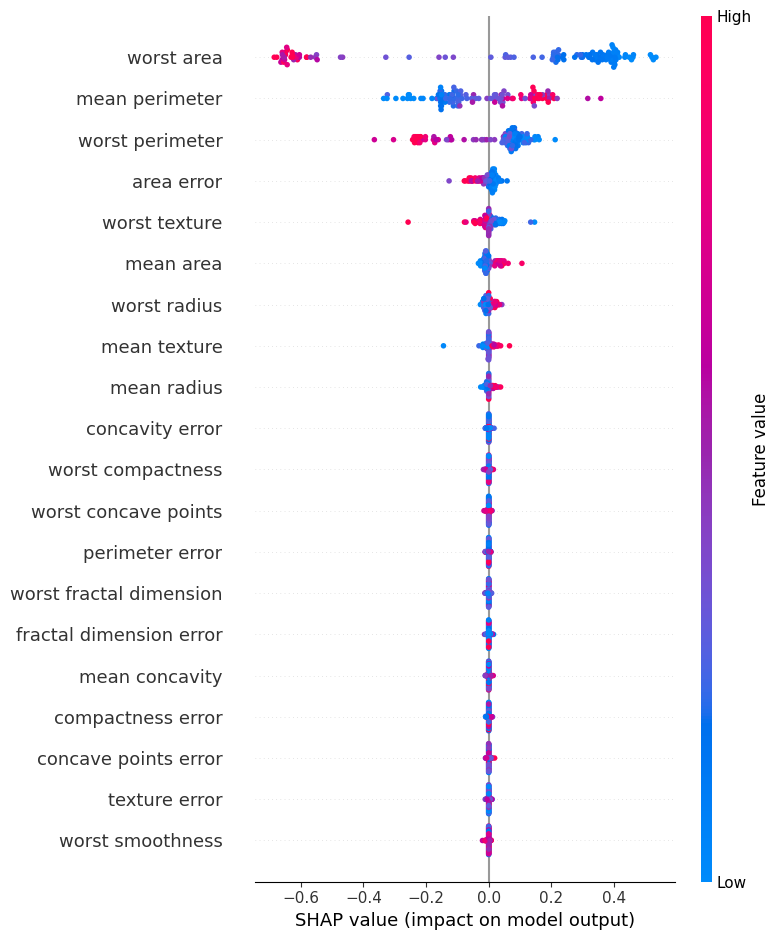

In [13]:
shap.summary_plot(shap_values, X_test, feature_names=data['feature_names'])

In [14]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[5], X_test[5], feature_names=data['feature_names'])
# outra forma de exibição do shap, mostra o worst perimeter e area aumentando o valor da previsão e o mean perimeter reduzindo

In [15]:
mean_abs_shap_values = np.mean(np.abs(shap_values),axis=0)

In [16]:
feature_names = data['feature_names']
feature_importance = zip(feature_names, mean_abs_shap_values)
sorted_feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)

In [17]:
sorted_feature_importance

[('worst area', 0.40231370981594),
 ('mean perimeter', 0.13318166199617568),
 ('worst perimeter', 0.11391310833466796),
 ('area error', 0.021681909657288945),
 ('worst texture', 0.02165504124212355),
 ('mean area', 0.01748175561000573),
 ('worst radius', 0.011351254882298462),
 ('mean texture', 0.009803441249782177),
 ('mean radius', 0.008027735220973733),
 ('concavity error', 0.0023761037230754715),
 ('worst compactness', 0.002352352100293842),
 ('worst concave points', 0.002335388131797378),
 ('perimeter error', 0.0022587277185229667),
 ('worst fractal dimension', 0.002196526174390619),
 ('fractal dimension error', 0.0020787339052035004),
 ('mean concavity', 0.0020482047111439737),
 ('compactness error', 0.002045243693241834),
 ('concave points error', 0.0020003923931850485),
 ('texture error', 0.0019972711964970856),
 ('worst smoothness', 0.001995547303508101),
 ('mean symmetry', 0.0019808504954397137),
 ('symmetry error', 0.001956315117582369),
 ('radius error', 0.00195461632092399

In [19]:
from sklearn.metrics import precision_score, recall_score,  accuracy_score

In [26]:
predição = model.predict(X_test)
print('precisão:',precision_score(y_test, predição))
print('recall:',recall_score(y_test, predição))
print('Acurácia:',accuracy_score(y_test, predição))
#algumas métricas mostradas no primeiro vídeo

precisão: 0.9240506329113924
recall: 0.9864864864864865
Acurácia: 0.9385964912280702
